In [16]:
import cv2
import pytesseract
from PIL import Image
import easyocr
import imutils
from matplotlib import pyplot as plt
import numpy as np

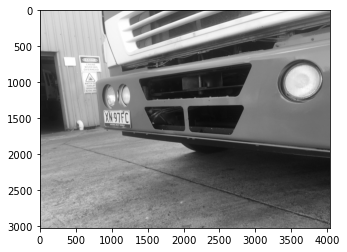

In [61]:
PICA_PATH = '/home/gordon-workspace/local_workspace/experiment_ground/Adonis_Akl_16.4.2021_13.57_out.jpg'
PICB_PATH = '/home/gordon-workspace/local_workspace/experiment_ground/Adonis_Akl_19.4.2021_14.04_out.jpg'
# PIC_1 = '/media/sf_BLOB_STORAGE/boomgate_weekly/2.jpg'
PIC_1 = '/media/sf_BLOB_STORAGE/boomgate_weekly/5.jpg'

img = cv2.imread(PIC_1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

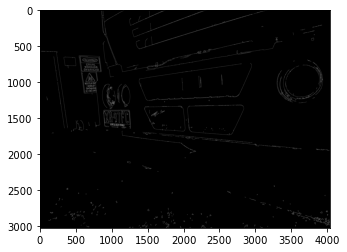

In [62]:
# Noise reduction 
bfilter = cv2.bilateralFilter(gray,11,17,17)
# Edge Detection
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [63]:
# pytesseract.image_to_string(img)
# cv2.imshow('Result', img)
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [67]:
location = None 
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
#     print(approx) 
    if len(approx) == 4:
#         print(approx)
        location = approx
        print(location)
        
        break

[[[560 648]]

 [[572 732]]

 [[826 737]]

 [[815 659]]]


In [66]:
location

array([[[560, 648]],

       [[572, 732]],

       [[826, 737]],

       [[815, 659]]], dtype=int32)

In [68]:
mask  = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255,-1)
new_image = cv2.bitwise_and(img, img, mask=mask)

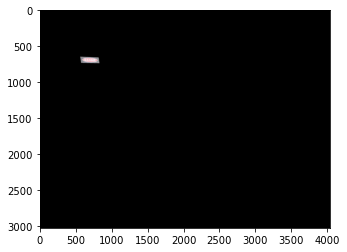

In [69]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))